# **Modelling and Evaluation**
---

## Objective

- Answer business requirement 2:
    * The client needs a tool that can tell their pets apart based on live image data.

## Inputs

- The folder `inputs/datasets/pets` containing the subfolders `train`, `test`, and `validation`
- The correctly labelled folders in each of these subfolders
- An adequate amount of preprocessed png images (size 450x450) in each labelled folder, showing a close-up of the pet's face
- Image shape file

## Outputs

- Images distribution plot in train, validation, and test set
- Image augmentation
- Class indices
- Results of ML hyperparameter optimization
- Machine learning model creation and training
- Saved model
- Learning curve plot for model performance
- Model evaluation in pickle file
- Prediction on test data
- Prediction on live data

---

### Import libraries

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from matplotlib.image import imread
from tensorflow.keras.preprocessing import image
from PIL import Image
import shutil
import random

sns.set_style("white")


### Set the correct working directory

In [2]:
# Check the current working directory; os.chdir to change working directory if needed
cwd = os.getcwd()
cwd

'd:\\Projekte\\Coding\\CodeInstitute\\PP5\\jupyter_notebooks'

In [3]:
os.chdir(os.path.dirname(cwd))
cwd = os.getcwd()
cwd

'd:\\Projekte\\Coding\\CodeInstitute\\PP5'

### Set the paths to the input and output folders

In [4]:
# Save path names for each directory
full_dataset_path = os.path.normpath(os.path.join(cwd, 'inputs/datasets/pets'))

output_path = os.path.join(cwd, 'outputs')
train_path = os.path.join(full_dataset_path, 'train')
test_path = os.path.join(full_dataset_path, 'test')
validation_path = os.path.join(full_dataset_path, 'validation')



### Create style for highlighting errors and warnings

In [5]:
from colorama import Fore, Style

# Error notification style
def print_err(message):
    print(f'{Fore.RED}ERROR:{Style.RESET_ALL}\n{message}')

# Warning notification style
def print_warn(message):
    print(f'{Fore.YELLOW}WARNING:{Style.RESET_ALL}\n{message}')

---
## **Label distribution**
---

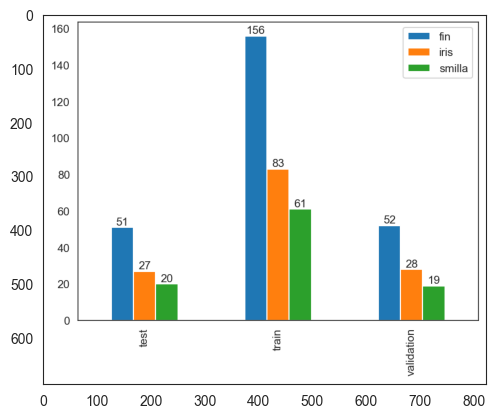

        test  train  validation
fin       51    156          52
iris      27     83          28
smilla    20     61          19


In [16]:
dataset_stats = joblib.load('outputs/labels_distribution.pkl')
plt.imshow(imread('outputs/labels_distribution.png'))
plt.show()
df = pd.DataFrame(dataset_stats)
print(df)

### Data balancing and augmentation

We decide to balance the data through augmentation and oversampling.

In [17]:

def augment(aug_percentage, stats):
    aug_stats = {}
    df = pd.DataFrame(stats)
    print(df)
    for key, value in stats.items():
        aug_stats[key] = {}
        for label, amount in value.items():
            pass #print(aug_stats[key][label])

# By how many percent should the largest label be augmented?
augment(0.3, dataset_stats)

        test  train  validation
fin       51    156          52
iris      27     83          28
smilla    20     61          19


In [ ]:
# Load all images from specified folder, resize them, save them as np array in X and save their labels in y
def save_images_in_array(path, size=(200, 200), has_label=True):
    X, y = np.array([], dtype='int'), np.array([], dtype='object')
    if has_label:
        for label in os.listdir(path):
            img_list = os.listdir(os.path.join(path, label))
            for img_name in img_list:
                img = image.load_img(os.path.join(path, label, img_name))
                img_resized = image.img_to_array(img.resize(size, resample=Image.LANCZOS))
                if img_resized.max() > 1:
                    img_resized = img_resized / 255
                new_shape = (-1, size[0], size[1], 3)
                X = np.append(X, img_resized).reshape(new_shape)
                y = np.append(y, label)
    else:
        label = 'unknown'
        img_list = os.listdir(path)
        for img_name in img_list:
            img = image.load_img(os.path.join(path, img_name))
            img_resized = image.img_to_array(img.resize(size, resample=Image.LANCZOS))
            if img_resized.max() > 1:
                img_resized = img_resized / 255
            new_shape = (-1, size[0], size[1], 3)
            X = np.append(X, img_resized).reshape(new_shape)
            y = np.append(y, label)
            
    # Shuffle the training set
    train_set = list(zip(y, X))
    random.shuffle(train_set)
    y_shuffled, X_shuffled = list(map(list, zip(*train_set)))
    X = np.array(X_shuffled, dtype='float')
    y = np.array(y_shuffled, dtype='object')
    
    return X, y
